## Part 0: Data visualization
### Understand the dataset by plotting

This is a low-dimensinoal digit recognition dataset. You can show the data as follow. 

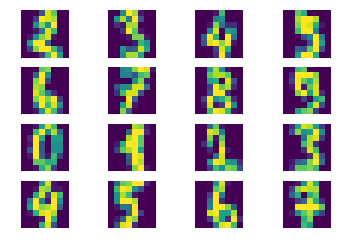

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


digits = load_digits()
X, y = digits.data, digits.target

for i in range(1,17):
    plt.subplot(4,4,i)
    plt.imshow(X[i+1].reshape((8,8)))
    plt.axis('off')

plt.show()

In [2]:
X.shape

(1797, 64)

### Training and Testing Split

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Part 1: Classification Methods

1) Please apply the Random Forest Method to this dataset and find the feature_importance coefficient and try to visualize the feature importance matrix. 

2) Please apply the SVM classifiers with linear kernel. Please also show the coefficient matrix. You should show the coefficient for each class and visualize the coeffient.

3) Please apply the SVM with Gaussian kernel. Please use GridSearchCV to find a good tuning parameter and find the feature_importance coefficient. 

4) Please apply the Logistic Regression and find the feature importance matrix for each class.


Hint: 
You don't need to do use cross-validation or GridSearchCV for 1), 2), 4), 5) since no penalty is applied. 3) is very sensitive to the kernel bandith selection, which you should use GridSearchCV. Also, you don't have to add penalty for Logistic regression. For 1), 2), 4), 5) please find a reasonable tuning parameters by yourself.

In [4]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification

model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [5]:
importances = model.feature_importances_
print(importances)

[  0.00000000e+00   2.33801372e-03   2.10119480e-02   1.00279415e-02
   9.42152836e-03   1.97593816e-02   8.75806309e-03   7.90701457e-04
   6.17210025e-05   1.06767804e-02   2.81445026e-02   6.79779856e-03
   1.57552246e-02   2.60370885e-02   5.34570321e-03   6.44581675e-04
   6.35711664e-05   7.50093680e-03   2.03939927e-02   2.56304130e-02
   3.10312254e-02   5.00650149e-02   9.75891237e-03   4.14873655e-04
   5.84111609e-05   1.32004422e-02   4.12620464e-02   2.57592338e-02
   3.41008064e-02   2.31912520e-02   3.07128207e-02   4.30374616e-05
   0.00000000e+00   2.86003077e-02   2.60555740e-02   1.82709548e-02
   3.90668291e-02   1.86140648e-02   2.61845180e-02   0.00000000e+00
   4.37786680e-05   9.82833464e-03   3.72619523e-02   4.39168125e-02
   2.12193685e-02   1.76999206e-02   2.07057395e-02   5.37638504e-05
   4.52429423e-05   2.47577265e-03   1.71109164e-02   2.16130833e-02
   1.37205691e-02   2.17269594e-02   2.48182267e-02   2.21210637e-03
   2.25305409e-05   1.94420827e-03

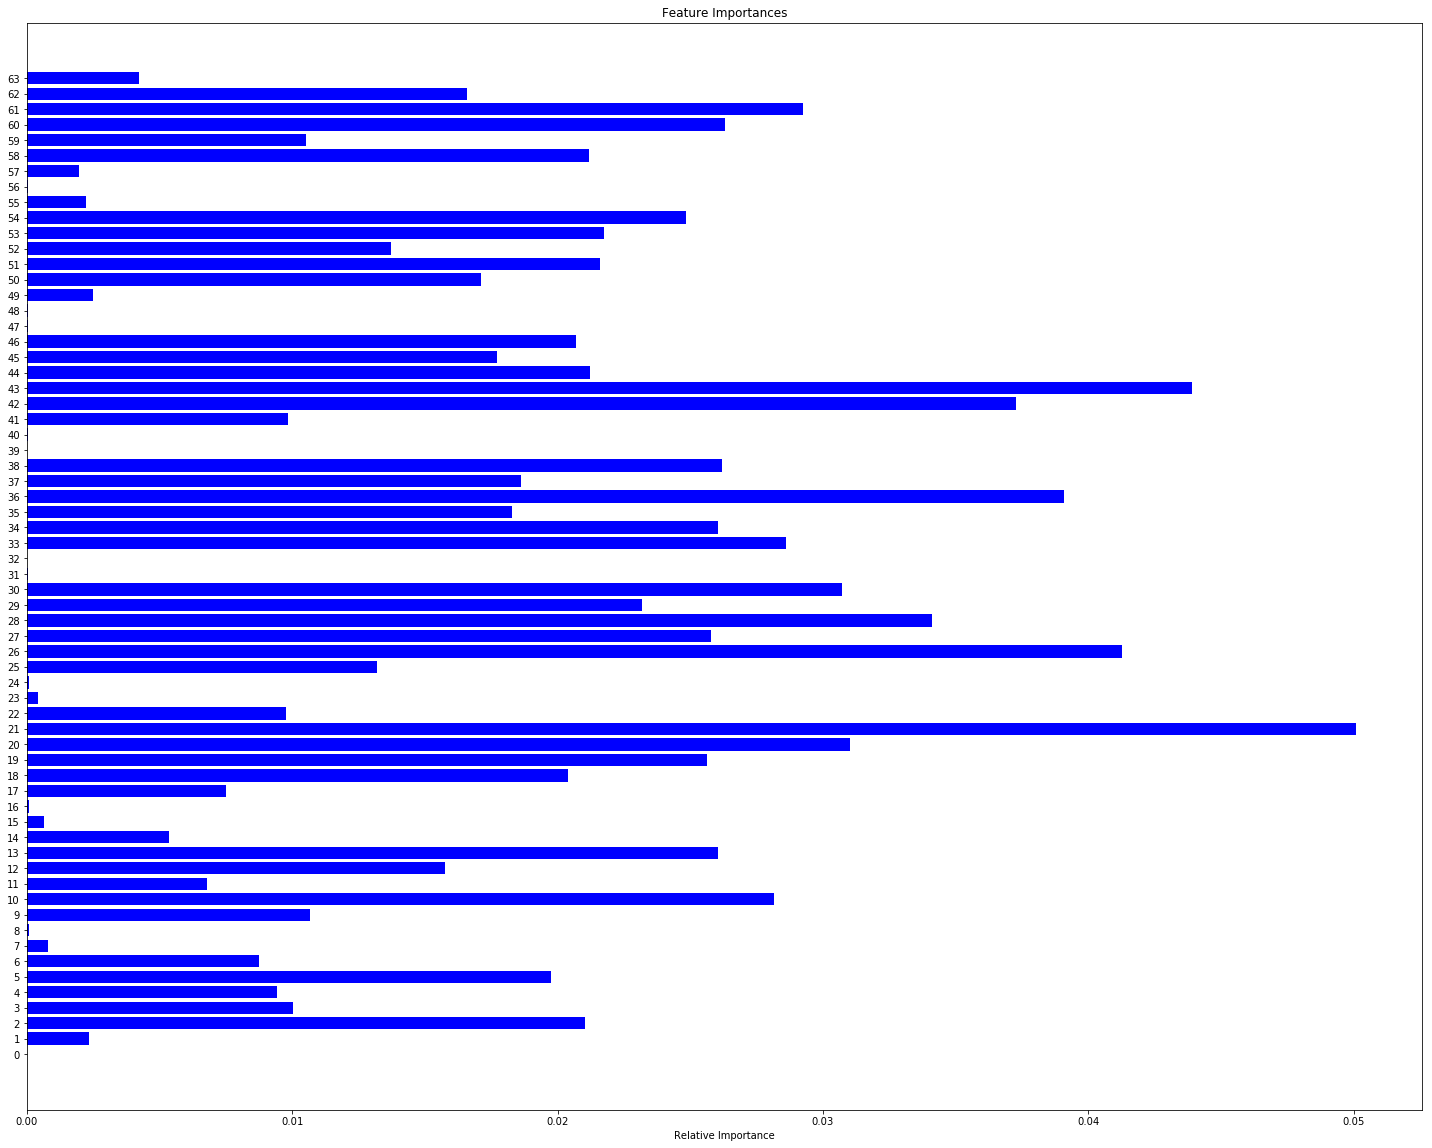

In [6]:
plt.figure(figsize=(25,20))
plt.title('Feature Importances')
plt.barh(range(len(importances)), importances, color='b', align='center')
plt.yticks(range(len(importances)))
plt.xlabel('Relative Importance')
plt.show()

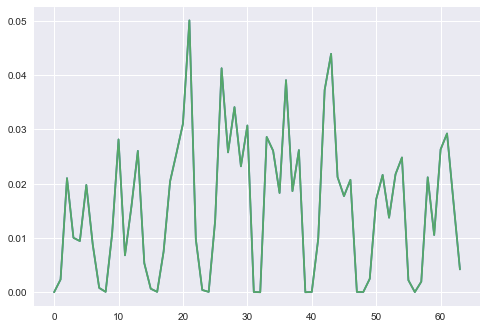

In [46]:
plt.plot(importances)
plt.show()

In [7]:
from sklearn import svm
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
SVM_coef = linear_svc.coef_
print(SVM_coef.shape)

(45, 64)


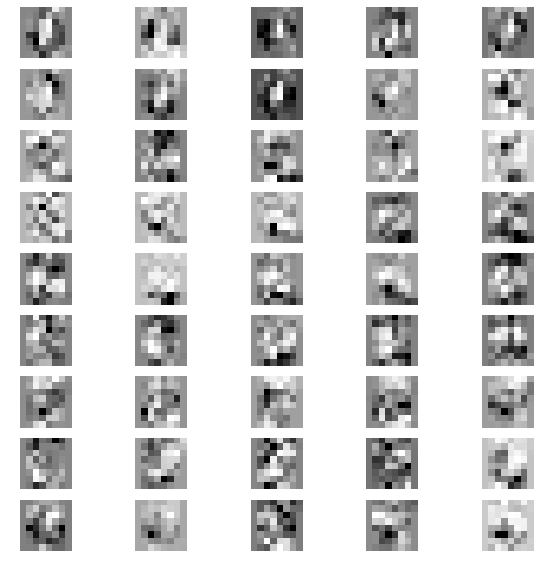

In [39]:
plt.figure(figsize=(10,10))
for i in range(1,46):
    plt.subplot(9,5,i)
    plt.imshow(SVM_coef[i-1].reshape((8,8)))
    plt.axis('off')

plt.show()

In [10]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.0001,0.001,0.01,0.1,1,10,100],
                     'C': [0.01, 0.1, 1, 10, 100, 1000]}
]
clf = GridSearchCV(SVC(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clf.best_params_)


Best parameters set found on development set:
{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [11]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
LR_coef = logisticRegr.coef_
print(LR_coef)

[[  0.00000000e+00  -3.93542683e-02   2.47013712e-02   3.18398411e-02
    9.41385175e-03  -2.59855330e-01  -1.60847426e-01  -2.45709275e-02
    3.79963187e-05  -1.21018205e-01   3.44679657e-02   1.90162503e-01
    2.28029956e-01   2.31761744e-01   3.67418524e-02  -3.25694327e-02
   -5.35162958e-03   7.56467659e-02   1.97366382e-01   2.36551222e-02
   -3.13864758e-01   2.79188517e-01  -1.76388955e-02  -6.30306624e-03
   -2.68070700e-03   7.81970891e-02   5.40601315e-02  -1.40788318e-01
   -6.36664095e-01   1.19663093e-01  -1.22227245e-02   1.81587397e-04
    0.00000000e+00   1.58061371e-01   1.79523618e-01  -8.02924304e-02
   -5.61562378e-01  -8.74060127e-03   4.73651966e-02   0.00000000e+00
   -5.73079451e-05  -1.79717581e-03   3.00546675e-01  -3.18068260e-01
   -2.52739658e-01  -5.42035635e-02   9.62078735e-02   3.14758726e-05
    1.34770280e-03  -1.39831140e-01   1.32389377e-01  -1.71325525e-01
    6.01644129e-02  -6.03521388e-02  -1.01751256e-01  -7.74378831e-02
    9.16124253e-06  

In [13]:
LR_coef.shape

(10, 64)

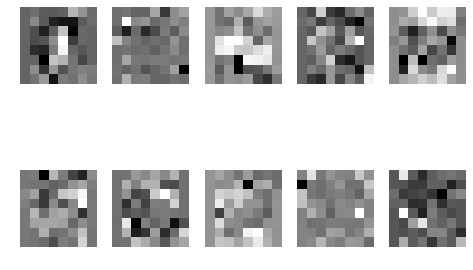

In [44]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(LR_coef[i-1].reshape((8,8)))
    plt.axis('off')

plt.show()

## Part 2: Plotting Learning Curves

We would like to plot the learning curve of the data. The following code is taken from the following this [example](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html), where we can use the function of [learning curve](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve) to plot the learning curve in the class. 



In [15]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt




Please use the follow code from this [example](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html) to understand how to plot the learning curve. For here the default score is cross-validation. 

1) Please apply the four classifiers as in Part 1 and compute the learning curve on this dataset. 

2) Please comment on the learning curve. 



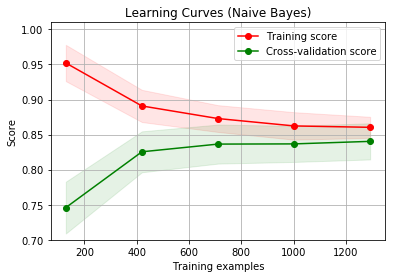

In [16]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()


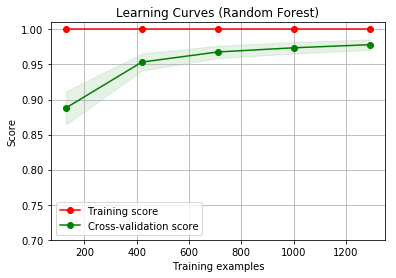

In [17]:
title = "Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=10)

estimator = RandomForestClassifier(n_estimators=1000)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()


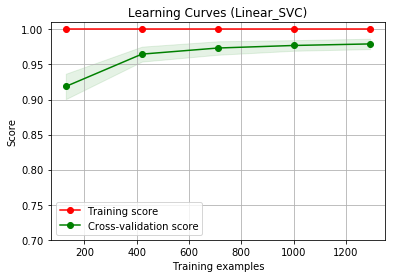

In [18]:
title = "Learning Curves (Linear_SVC)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=10)

estimator = SVC(kernel='linear')
plot_learning_curve(estimator, title, X_train, y_train, ylim= (0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()

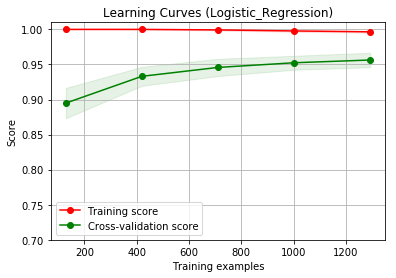

In [19]:
title = "Learning Curves (Logistic_Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=10)

estimator = LogisticRegression(solver = 'lbfgs')
plot_learning_curve(estimator, title, X_train, y_train, ylim= (0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()

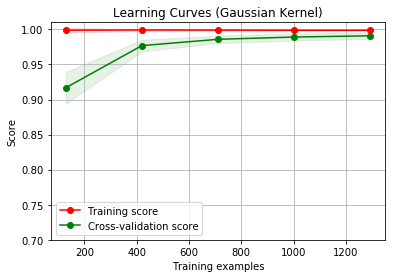

In [20]:
title = "Learning Curves (Gaussian Kernel)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=10)

estimator = SVC(kernel='rbf',C=1,gamma = 0.001)
plot_learning_curve(estimator, title, X_train, y_train, ylim= (0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()

### Part 3: Use Multi-Layer Perception
Please use the MLPClassifier in scikit-learn to fit the model. Please feel free to choose your own architecture.


In [21]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(hidden_layer_sizes=(50,10), max_iter=250, alpha=0.001,
                     solver='sgd', verbose=10,  random_state=10,tol=0.000001)
MLP.fit(X_train, y_train)
y_pred = MLP.predict(X_test)


Iteration 1, loss = 4.66958736
Iteration 2, loss = 2.31131418
Iteration 3, loss = 2.19752264
Iteration 4, loss = 2.16495168
Iteration 5, loss = 2.12556472
Iteration 6, loss = 2.07738427
Iteration 7, loss = 2.02261359
Iteration 8, loss = 1.98153066
Iteration 9, loss = 1.94223449
Iteration 10, loss = 1.89747143
Iteration 11, loss = 1.85606198
Iteration 12, loss = 1.81774798
Iteration 13, loss = 1.78742349
Iteration 14, loss = 1.74491943
Iteration 15, loss = 1.70798169
Iteration 16, loss = 1.67075776
Iteration 17, loss = 1.63473542
Iteration 18, loss = 1.59828059
Iteration 19, loss = 1.55662942
Iteration 20, loss = 1.52026070
Iteration 21, loss = 1.48443289
Iteration 22, loss = 1.45508003
Iteration 23, loss = 1.42623433
Iteration 24, loss = 1.40164145
Iteration 25, loss = 1.37894601
Iteration 26, loss = 1.35142359
Iteration 27, loss = 1.32000751
Iteration 28, loss = 1.26820550
Iteration 29, loss = 1.20542644
Iteration 30, loss = 1.15771958
Iteration 31, loss = 1.10729919
Iteration 32, los

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(accuracy_score(y_test, y_pred))


0.977777777778


### Part 4: CNN
Please design a small CNN architecture on this dataset. Please feel free to choose any architecture. 

In [23]:
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


net1 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dropout1', layers.DropoutLayer),
            ('dense', layers.DenseLayer),
            ('dropout2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    # input layer
    input_shape=(None, 1, 28, 28),
    # layer conv2d1
    conv2d1_num_filters=32,
    conv2d1_filter_size=(5, 5),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),  
    # layer maxpool1
    maxpool1_pool_size=(2, 2),    
    # layer conv2d2
    conv2d2_num_filters=32,
    conv2d2_filter_size=(5, 5),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    # layer maxpool2
    maxpool2_pool_size=(2, 2),
    # dropout1
    dropout1_p=0.5,    
    # dense
    dense_num_units=256,
    dense_nonlinearity=lasagne.nonlinearities.rectify,    
    # dropout2
    dropout2_p=0.5,    
    # output
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=10,
    # optimization method params
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,
    max_epochs=10,
    verbose=1,
    )
# Train the network
nn = net1.fit(X_train, y_train)

ModuleNotFoundError: No module named 'lasagne'

In [ ]:
preds = net1.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, preds)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()